# Frog Jump Statististics Problem

This notebook attempts some statistical modelling of the frog jump problem outlined in the video below.

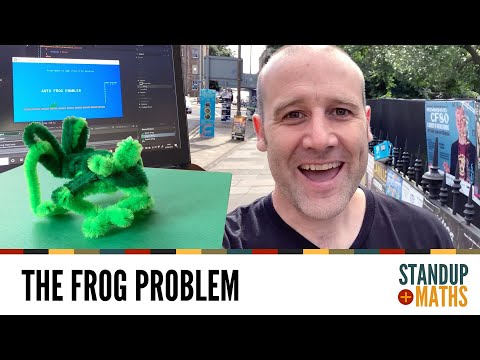

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZLTyX4zL2Fc')

Code written by Matt Parker (standupmaths) is available at https://github.com/standupmaths/frog_problem

## The Frog Problem
1. a frog is on one side of a river
2. there are nine lily pads across the river, plus the opposite bank (10 positions)
3. the frog is equally likely to jump to any of the positions ahead of it

**How many jumps does the frog likely take to cross the river?**

In [2]:
from random import randint
from collections import Counter
import pandas as pd

riverWidth = 10
numberOfTrials = 100000
listOfJumps = []

for x in range(0, numberOfTrials):
    position = 0
    numberOfJumps = 0
    while position < riverWidth:
        jump = randint(1, riverWidth-position)
        position += jump
        numberOfJumps += 1
        #print(x, position, numberOfJumps)
    listOfJumps.append(numberOfJumps)

counts = Counter(listOfJumps)
df = pd.DataFrame(counts.values(), index=counts.keys(), columns=['Frequency'])
df.sort_index(axis=0, inplace=True)
df

,Frequency
1,10165
2,28219
3,32290
4,19798
5,7536
6,1721
7,241
8,29
9,1


So based on a million trials with ten positions, it looks like **the frog is most likey to cross in three jumps**.

However two and four jumps are not much less likely. Let's look at a graph of these data.

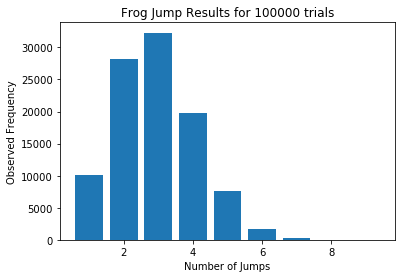

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(counts.keys(),counts.values())
plt.title('Frog Jump Results for ' + str(numberOfTrials) + ' trials')
plt.xlabel('Number of Jumps')
plt.ylabel('Observed Frequency')
plt.show()

There's probably an equation that could represent these results, other than just a weighted average, and a way to generalize this to $n$ river positions. Those remain as a challenge for the reader.